In [222]:
import random as rnd
import timeit as tt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [225]:
def prisoner(n):
    tag_boxes = list(range(1,n+1)) # list containing prisoner number tags that will eventually be placed inside boxes
    rnd.shuffle(tag_boxes) #randomize tag numbers
    box_numbers = {'Box '+ str(i): tag_boxes[i-1] for i in range(1,n+1)} # assigned seat
    #results = [] # 1 if in index[i-1] if the ith prisoner successfully finds his tag inside a box
    for j in range(1, n+1):
        pick = j # jth Prisoner's first pick - his own tag
        i = 1
        while (box_numbers['Box '+str(pick)] != j) & (i < int(n/2)+1):
            pick = box_numbers['Box '+str(pick)]
            i += 1
        if i == int(n/2)+1: return 0 
    return 1     

This is the story of the fall of an evil mastermind prison warden who wreaked havoc during his tenure in one of the biggest prisons in the world. 

The warden was notorious for playing mind games with the death row prisoners. One day, he gathered all 100 of them numbered 1 through 100, and presented them with a unique opportunity. He made the following announcement:

In the common grounds, I have placed 100 boxes with each box containing one of your ID. You can go outside one person at a time and can randonly open up to 50 boxes, one at a time. You must close the box after you open it. If every one of you manages to find your ID in a box, you are all free to leave the prison. But even one of you fails, you will all die today. You can come up with a stratergy before the first prisoner goes outside. Once he is out, the game begins and any means of communication is prohibited. Good luck! 

How ingenious!! If the prisoners do not come up with a strategy, they are doomed because the chances of this happening by luck(at random) are extremely small. Since there is a 50% chance for each prisoner to find his ID in a box, the probability that all 100 of them find their ID is

The probability of the prisoners winning this game through luck. 

Preliminaries:

The prisoners are not too shabby themselves. They endured the warden's games for so long. It is only natural that they put up a good fight. Before revealing the prisoner's strategy, let us dive into abstract algebra. 

Permutations:

We have all heard the word permutations. They hold a special and strong place in the world of abstract algebra, especially finite groups. It is also not surprising that we are talking about it since the game also involves a permutation of 100 IDs. 

 We do not need to know anything technical, really. All we need is to understand permutations as a function and a different perspective to view them. For example, take this example of arranging 8 objects numbered 1 through 8 in a line. 

One arrangement of 8 objects

This is how we think of this arrangement as a function. 

The function that takes each object to its position

In the demonstration above, the 8th object is placed in the 5th position, and so on. The reason this is helpful is to identify what we call a cycle. Think about how the objects 2 and 7 are arranged. They are interchanged, right? That's a cycle. That is not the only type of cycle: Look at objects 3,6 and 4. 

3rd object is placed in 6th position. 6th object is placed in 4th position and finally, 4th object is placed in 3rd position. 

So, when you start at some object and end at the same object's position, we call it a cycle. Some cycles are trivial, for example, 1st object is placed in the first position. That is a trivial cycle meaning it describes a fixed position. 

How is this helpful? 

Well, this perception is even better. For example, we can think of the permutation 17638425 as follows:

Permutation as a composition of cycles

This is how we read this notation. 2 is sent to 7 and 7 is sent to 2. That's a cycle. 3 is sent to 6 and 6 is sent to 4 and 4 is sent to 3. Finally, 5 is sent to 8 and 8 to 5. We agree that the numbers not included here have to be fixed points. For example, 1 is sent to 1. 

This notation conveys the exact same information as 17638425. As you might have noticed, this notation is definitely not unique. We can very well write the same as

Another way to write the same arrangement as above

If you are curious, take another arrangement and try writing it using this definition. 

The Strategy:

The prisoners had a good understanding of permutations and cycles so they came up with this strategy. 

The first box we each pick has to be the box with our ID number. If the box does not have your ID but some other number X, then pick next the Box: X. Open Box: X. If it doesn't your ID but the number Y, then pick next the Box: Y. Continue this until the end of your turn. 

Well, would you believe this strategy has a success probability of a little over 31%? Not only that, this is the optimal strategy for this problem. The optimality proof is beyond the scope of this article. However, we can talk about the probability of success. 

Let's take the same example we used. Imagine, instead of 100 prisoners, we only have 8, and the warden arranged the ID with respect to this arrangement: 17638425. Since there are only 8 prisoners, they only get to open 4 to preserve the nature of the problem. Do you think the prisoners win in this particular arrangement? 

They do! Try working it out to see for yourself. But why? The best way to understand is to come up with an example where they do not win. Here is one

The same arrangement as a composition of different cycles:

Can you see why? The 2nd, 7th, and the 8th prisoner will find their ID. But that's it. As you can see, the 'losers' are all in the same cycle. That is not a coincidence. 

Observation: When there are '2n' prisoners, you need the permutation to have cycles less than or equal to length 'n'. 

In the first example, all the cycles had lengths less than 4 so everyone managed to get their IDs. However, in the second example, that wasn't the case. Can we redefine the problem for our calculations?

How many permutation of first 100  natural numbers have cycles of lengths more than 50?

This is way easier to interpret and answer. The first thing to notice is that you can only have one cycle of length more than 50 per arrangement. Otherwise, you are permuting more than 100 elements. So, first, you pick 'n' elements from 1 through 100 to make it a cycle where 'n' is an integer strictly greater than 50. We know exactly how many ways we can do this:

Number of ways you can pick n elements out of 100

Once you pick 'n' elements, there are 'n!' ways to arrange them. However, we want them to be a cycle. Meaning, it is a circular arrangement. As we discussed earlier, a cycle (3145) is the same as (4531). So, for every arrangement, there are 'n' duplicates so the number of ways you can arrange them uniquely in a cycle is given by:

Do not forget the remaining (100-n) elements. They can however be arranged in any way. They need not be a cycle. So, there are (100-n)! ways to arrange them. We combine everything to get:

Number of permutations of 100 with cycles of length n > 50.

So, the probability that a permutation has a cycle of length 'n' with n>50 is

From here, our calculation is straightforward. We do not want any cycles of length more than 50. So, we subtract all of those probabilities from 1. 

Damn! This is astonishing compared to the original chances they had. 

You might wonder why this led to the fall of the warden. Well, that just sounded fun. He really must have been devastated though. 

Simulation: 

We can verify this solution through simulation as well. 

def prisoner(n):
    tag_boxes = list(range(1,n+1)) # list containing prisoner number tags that will eventually be placed inside boxes
    rnd.shuffle(tag_boxes) #randomize tag numbers
    box_numbers = {'Box '+ str(i): tag_boxes[i-1] for i in range(1,n+1)} # assigned seat
    #results = [] # 1 if in index[i-1] if the ith prisoner successfully finds his tag inside a box
    for j in range(1, n+1):
        pick = j # jth Prisoner's first pick - his own tag
        i = 1
        while (box_numbers['Box '+str(pick)] != j) & (i < int(n/2)+1):
            pick = box_numbers['Box '+str(pick)]
            i += 1
        if i == int(n/2)+1: return 0 
    return 1 

If we run this function multiple times and record the success and failure rates, we get the probability close to the theoretical value (dashed black line). 

Graph showing frequency approaching theoretical probability

Other observations:

Does the number of prisoners affect the strategy?

Well, if there are only 2 prisoners, this strategy will give the prisoners a 50% chance to come out alive. However, as the number of prisoners increases, the probability seems to gradually decrease. That is not so surprising. 

But for an arbitrarily large number of prisoners, the probability of success is approximately:

If you are curious about this fact, look into Euler's constant and Harmonic series. 

Variations:

There are plenty of variations of this problem. However, I am fond of these two:

For an arbitrarily large number of prisoners, if any prisoner who ends up finding his ID gets released, what are the chances that an individual prisoner gets released following the strategy vs. through luck?

If one prisoner gets to go outside and look at all the boxes and swap the contents of exactly two boxes, What is the optimal strategy for that person? What is the new probability of success?  



In [226]:
def runtest(m,n): #  m is the number of times we repeat the experiment, n is the number of prisoners
  result = [prisoner(n) for i in range(1,m+1)]
  return sum(result)

In [196]:
runtest(100,10000)

KeyboardInterrupt: 

In [227]:
x = list(range(100,10000,50))
y = [runtest(i,100) for i in x]
ratio = [j/i for i,j in zip(x,y)]

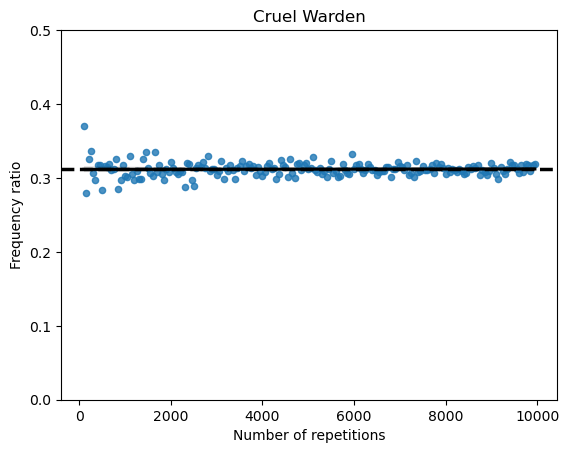

In [228]:
data = {"Number of repetitions": x, "Frequency ratio": ratio}
df = pd.DataFrame(data)
sns.regplot(x=df["Number of repetitions"], y=df["Frequency ratio"], scatter_kws={'s': 20}, line_kws = {'color':'black', })
plt.title('Cruel Warden')
plt.axhline(y = 0.31183, color = 'black', linewidth = 2.5, linestyle = 'dashed')
plt.ylim(0,0.5)
plt.savefig('Creul_warden')
plt.show()

In [219]:
def harmonic(x):
    sum([1/i for i in range(1,x+1)])

In [218]:
sum([1/i for i in range(1,30,2)])

2.335872634305894

In [ ]:
%%manim -qm Permutations

class Permutations(Scene):
    def construct(self):
        self.camera.background_color = WHITE
        circle1 = Circle(color= BLUE , radius = 0.5).shift(UP*2)
        circle2 = Circle(color= BLUE , radius = 0.5).shift(LEFT *2)
        circle3 = Circle(color= BLUE , radius = 0.5).shift(RIGHT*2)
        circle4 = Circle(color= BLUE , radius = 0.5).shift(DOWN*2)
        a = MathTex("1").shift(UP*2)
        a.set_color_by_tex("1", BLACK)
        #circle5 = Circle(color= BLUE , radius = 0.5)
        self.play(GrowFromCenter(circle1),GrowFromCenter(circle2),GrowFromCenter(circle3),GrowFromCenter(circle4))
        self.play(Write(a))
        self.wait()

In [221]:
x = 1 - sum([1/i for i in range(51,101)])
x

0.3118278206898051

In [229]:
import pandas as pd
import numpy as np

In [289]:
data = [[3, '2020-03-21 10:16:13'], [7, '2020-01-04 13:57:59'], [2, '2020-07-29 23:09:44'], [6, '2020-12-09 10:39:37']]
signups = pd.DataFrame(data, columns=['user_id', 'time_stamp']).astype({'user_id':'Int64', 'time_stamp':'datetime64[ns]'})
data = [[3, '2021-01-06 03:30:46', 'timeout'], [3, '2021-07-14 14:00:00', 'timeout'], [7, '2021-06-12 11:57:29', 'confirmed'], [7, '2021-06-13 12:58:28', 'confirmed'], [7, '2021-06-14 13:59:27', 'confirmed'], [2, '2021-01-22 00:00:00', 'confirmed'], [2, '2021-02-28 23:59:59', 'timeout']]
confirmations = pd.DataFrame(data, columns=['user_id', 'time_stamp', 'action']).astype({'user_id':'Int64', 'time_stamp':'datetime64[ns]', 'action':'object'})

In [297]:
confirmations['confirmation_rate'] = np.where((confirmations['action'] == 'confirmed'), 1, 0)

In [307]:
group_df = confirmations.groupby('user_id', as_index = False).confirmation_rate.mean().round(2)

In [308]:
join_df = signups.merge(group_df, on = 'user_id', how = 'left').fillna(0)[['user_id', 'confirmation_rate']]

In [309]:
join_df

,user_id,confirmation_rate
0,3,0.0
1,7,1.0
2,2,0.5
3,6,0.0


In [311]:
(1/2)**100

7.888609052210118e-31